# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_regression, SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Loading dataset

In [3]:
df=pd.read_csv('/Users/praveesha/Desktop/IS733/Lab/Lab10/roles_life_cycle_mapping_wide.csv')

In [4]:
df.head()

,Job_Title,Flag,L1_Business opportunity,L2_Find data sources,L3_Explore and visualize data,L4_Develop data (Clean Data),L5_Develop data (Feature-engineer),L6_Develop data (Collect additional data),L7_Train models,L8_Deploy best model,L9_Monitor and manage model usage,L10_Measure success,L11_Retrain or retire model
0,AI / ML Specialist,1,2,3,4,3,3,2,4,4,3,3,4
1,AI Adoption Specialist,1,3,1,1,1,1,0,2,2,3,4,1
2,AI Innovation Leader,1,4,1,1,0,1,1,1,1,2,3,2
3,AI Risk & Ethics Specialist,1,3,2,2,1,2,2,1,2,2,2,1
4,AI Test & Evaluation Specialist,1,1,1,2,1,2,2,2,4,4,4,2


In [5]:
df.describe()

,Flag,L1_Business opportunity,L2_Find data sources,L3_Explore and visualize data,L4_Develop data (Clean Data),L5_Develop data (Feature-engineer),L6_Develop data (Collect additional data),L7_Train models,L8_Deploy best model,L9_Monitor and manage model usage,L10_Measure success,L11_Retrain or retire model
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.211538,2.826923,2.500000,2.865385,2.596154,2.346154,2.403846,2.000000,2.134615,2.403846,2.634615,2.153846
std,0.412384,1.353589,1.111438,1.188653,1.192454,0.987860,1.124759,1.236694,1.268454,1.361366,1.469011,1.348705
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.750000,1.000000
50%,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
75%,0.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.250000,3.000000,3.000000,4.000000,3.000000
max,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
print(df.dtypes)

Job_Title                                    object
Flag                                          int64
L1_Business opportunity                       int64
L2_Find data sources                          int64
L3_Explore and visualize data                 int64
L4_Develop data (Clean Data)                  int64
L5_Develop data (Feature-engineer)            int64
L6_Develop data (Collect additional data)     int64
L7_Train models                               int64
L8_Deploy best model                          int64
L9_Monitor and manage model usage             int64
L10_Measure success                           int64
L11_Retrain or retire model                   int64
dtype: object


# Zero to Mean Standardization

In [8]:
import pandas as pd

# Select columns to standardize (excluding 'Job_Title' and 'Flag')
columns_to_standardize = [
    'L1_Business opportunity', 'L2_Find data sources', 'L3_Explore and visualize data',
    'L4_Develop data (Clean Data)', 'L5_Develop data (Feature-engineer)', 
    'L6_Develop data (Collect additional data)', 'L7_Train models', 
    'L8_Deploy best model', 'L9_Monitor and manage model usage', 
    'L10_Measure success', 'L11_Retrain or retire model'
]

# Apply standardization
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


In [14]:
df.describe()

,Flag,L1_Business opportunity,L2_Find data sources,L3_Explore and visualize data,L4_Develop data (Clean Data),L5_Develop data (Feature-engineer),L6_Develop data (Collect additional data),L7_Train models,L8_Deploy best model,L9_Monitor and manage model usage,L10_Measure success,L11_Retrain or retire model
count,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,0.211538,-1.323727e-16,-5.337611e-18,2.775558e-17,-1.110223e-16,-9.821204e-17,8.753682e-17,-4.270089e-18,3.629575e-17,8.753682e-17,4.910602e-17,7.686159e-17
std,0.412384,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00
min,0.000000,-2.108841e+00,-2.271284e+00,-1.584637e+00,-2.198394e+00,-2.398157e+00,-2.158061e+00,-1.632993e+00,-1.699267e+00,-1.782987e+00,-1.810959e+00,-1.612554e+00
25%,0.000000,-6.168719e-01,-4.542568e-01,-7.351410e-01,-5.048164e-01,-3.538265e-01,-3.625543e-01,-8.164966e-01,-9.032141e-01,-1.041265e+00,-6.080593e-01,-8.638684e-01
50%,0.000000,1.291127e-01,4.542568e-01,1.143553e-01,3.419724e-01,-3.538265e-01,-3.625543e-01,0.000000e+00,-1.071610e-01,-2.995419e-01,2.511549e-01,-1.151825e-01
75%,0.000000,8.750974e-01,4.542568e-01,9.638516e-01,3.419724e-01,6.683390e-01,5.351992e-01,2.041241e-01,6.888921e-01,4.421809e-01,9.385264e-01,6.335035e-01
max,1.000000,1.621082e+00,1.362770e+00,1.813348e+00,2.035550e+00,1.690504e+00,2.330706e+00,2.449490e+00,2.280998e+00,1.925626e+00,1.625898e+00,2.130875e+00


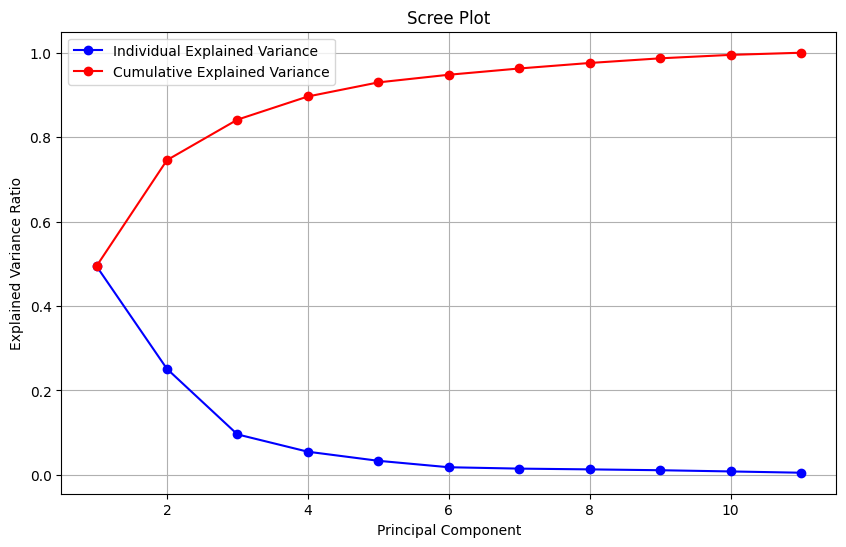

Number of components to retain for 95.0% variance: 7
Percentage of variance retained: 96.27%


In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select only the standardized numeric columns for PCA
columns_for_pca = [
    'L1_Business opportunity', 'L2_Find data sources', 'L3_Explore and visualize data',
    'L4_Develop data (Clean Data)', 'L5_Develop data (Feature-engineer)', 
    'L6_Develop data (Collect additional data)', 'L7_Train models', 
    'L8_Deploy best model', 'L9_Monitor and manage model usage', 
    'L10_Measure success', 'L11_Retrain or retire model'
]
numeric_data = df[columns_for_pca]

# Apply PCA to the already standardized numeric data
pca = PCA()
pca.fit(numeric_data)

# Explained variance ratios and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# Determine the number of components to retain for 95% variance
threshold = 0.95
n_components_to_retain = (cumulative_variance >= threshold).argmax() + 1
variance_retained = cumulative_variance[n_components_to_retain - 1] * 100

print(f"Number of components to retain for {threshold*100}% variance: {n_components_to_retain}")
print(f"Percentage of variance retained: {variance_retained:.2f}%")


### Retaining the first 5 components, as they capture approximately 90% of the total variance. After this, the explained variance starts to flatten out, indicating that they only capture the patterns that are very insignificant comparatively.

# Output the transformed dataset

In [21]:
# Transform the data to obtain the principal components
principal_components = pca.transform(numeric_data)

# Create a DataFrame for the transformed data with principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Optionally, add back 'Job_Title' and 'Flag' columns for reference
pca_df = pd.concat([df[['Job_Title', 'Flag']].reset_index(drop=True), pca_df], axis=1)

# Output the transformed dataset (first few rows)
print(pca_df.head())

# Save the transformed dataset to a CSV file if needed
pca_df.to_csv("pca_transformed_dataset.csv", index=False)


                          Job_Title  Flag       PC1       PC2       PC3  \
0               AI / ML Specialist      1  2.192857 -0.887657 -1.288829   
1           AI Adoption Specialist      1 -2.160953 -2.748097  0.668742   
2             AI Innovation Leader      1 -2.679792 -1.954108  1.862331   
3      AI Risk & Ethics Specialist      1 -1.762995 -0.381651  0.591493   
4  AI Test & Evaluation Specialist      1 -0.343743 -2.623507 -0.909770   

        PC4       PC5       PC6       PC7       PC8       PC9      PC10  \
0  0.469749 -1.035580  0.707123 -0.161425  0.214794 -0.111576  0.335270   
1 -0.728120  0.284912  0.043318 -0.574047 -0.688878  0.467669  0.439606   
2 -0.091537  0.264732 -0.262569  0.177993  0.357024 -0.180020  0.531882   
3  0.217433  0.007119 -0.455577 -0.132007 -0.400852 -0.716513  0.035506   
4  0.083760  0.877364 -0.136235 -0.373446 -0.593917 -1.140388 -0.371257   

       PC11  
0 -0.062743  
1  0.313339  
2  0.085162  
3  0.006812  
4 -0.533597  


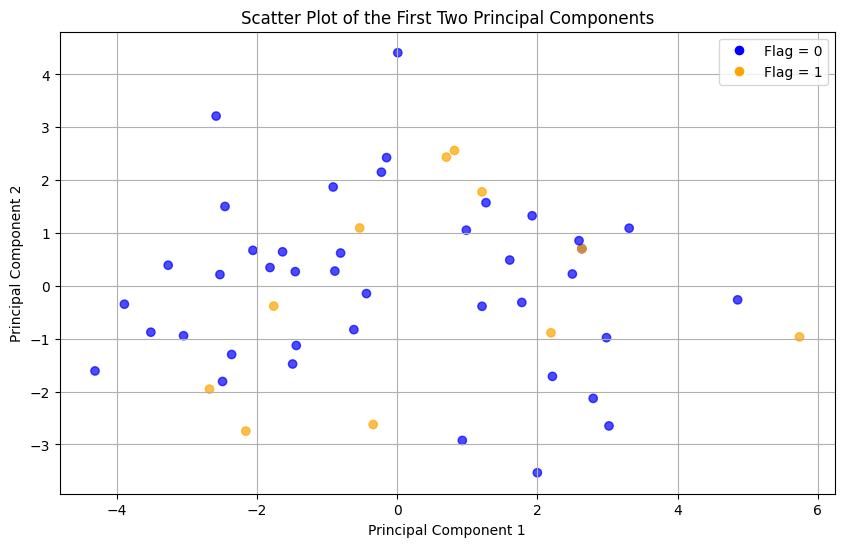

In [23]:
# Scatter plot of the first two principal components with binary Flag coloring
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'orange'}  # Use distinct colors for binary values
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Flag'].map(colors), alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of the First Two Principal Components')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Flag = 0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='Flag = 1')])
plt.grid(True)
plt.show()


#### Interpretation - Principle component 1 shows the more amount of variance in the data representing a key pattern or that differentiates the data points. Principle component 2 captures the second highest amount of variance after PC1. There is only minor overlap between flag 0 and 1 which means that PC1 and PC2 seperates the most data points. This indicates the two components captures most of the variance and the remaining components likely to capture less important information.

# Loading BMI.csv

In [26]:
df1=pd.read_csv('/Users/praveesha/Desktop/IS733/Lab/Lab10/BMI.csv')

In [28]:
df1. describe()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,44.884921,181.497619,73.430159,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762,19.150794
std,12.602040,30.438150,5.989882,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585,8.368740
min,22.000000,116.000000,31.600000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000,0.000000
25%,35.750000,161.550000,69.675000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000,12.475000
50%,43.000000,178.400000,73.400000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000,19.200000
75%,54.000000,199.775000,77.350000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000,25.300000
max,81.000000,366.100000,89.400000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000,47.500000


In [30]:
# Separate features and target variable
X = df1.drop(columns=['fatpctg', 'Age'])  # Drop 'fatpctg' (target) and 'Age'
y = df1['fatpctg']

# Standardize features for LASSO
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. Wrapper Method - Exhaustive Search using SequentialFeatureSelector
# Configure exhaustive feature selection
exhaustive_selector = SequentialFeatureSelector(
    RandomForestRegressor(), n_features_to_select="auto", direction="forward", cv=5
)
exhaustive_selector.fit(X, y)
top_n_wrapper_features = X.columns[exhaustive_selector.get_support()].tolist()

print("Top features selected by Wrapper Method (Exhaustive Search):", top_n_wrapper_features)

### 2. Embedded Method - LASSO for feature selection
# Lasso for feature selection with cross-validated alpha
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# Select features with non-zero coefficients
top_n_lasso_features = X.columns[(lasso.coef_ != 0)].tolist()

print("Top features selected by Embedded Method (LASSO):", top_n_lasso_features)

### 3. Filter Method - Information Gain (Mutual Information Regression)
# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select top n features based on mutual information scores
n = 5  # Choose the top n features to keep
top_n_filter_features = mi_scores_series.head(n).index.tolist()

print("Top features selected by Filter Method (Information Gain):", top_n_filter_features)

### Baseline Model - Using all features
baseline_model = RandomForestRegressor(random_state=0)
baseline_rmse = cross_val_score(baseline_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=0), scoring="neg_mean_squared_error")
baseline_rmse = (-baseline_rmse.mean()) ** 0.5  # Convert to RMSE

### Model Training with Cross-Validation on Selected Features
kf = KFold(n_splits=5, shuffle=True, random_state=0)
model = RandomForestRegressor(random_state=0)

# Evaluate performance using each feature set selected
def evaluate_feature_set(features, model):
    scores = cross_val_score(model, X[features], y, cv=kf, scoring="neg_mean_squared_error")
    return (-scores.mean()) ** 0.5  # RMSE

# RMSE for each method's top features
wrapper_rmse = evaluate_feature_set(top_n_wrapper_features, model)
lasso_rmse = evaluate_feature_set(top_n_lasso_features, model)
filter_rmse = evaluate_feature_set(top_n_filter_features, model)

# Display results
print(f"Baseline Model RMSE (using all features): {baseline_rmse:.3f}")
print(f"Wrapper Method RMSE: {wrapper_rmse:.3f}")
print(f"Embedded Method (LASSO) RMSE: {lasso_rmse:.3f}")
print(f"Filter Method (Information Gain) RMSE: {filter_rmse:.3f}")


Top features selected by Wrapper Method (Exhaustive Search): ['Neck', 'Chest', 'Abdomen', 'Hip', 'Knee', 'Wrist']
Top features selected by Embedded Method (LASSO): ['Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Top features selected by Filter Method (Information Gain): ['Abdomen', 'Chest', 'Hip', 'Thigh', 'Weight']
Baseline Model RMSE (using all features): 4.801
Wrapper Method RMSE: 4.780
Embedded Method (LASSO) RMSE: 4.822
Filter Method (Information Gain) RMSE: 5.057
